In [1]:
from nltk.corpus import brown
import nltk
# Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer

In [87]:
from konlpy.corpus import kolaw ,kobill

corpus = kolaw.open(kolaw.fileids()[0]).read()


In [88]:
from konlpy.tag import Kkma

ma = Kkma()

In [89]:
from nltk.tokenize import sent_tokenize

morphemes = list()

for sentence in sent_tokenize(corpus) :
    morphemes.extend(ma.pos(sentence))
    # morphs => [형태소, 형태소]
    # nouns => [형태소=명사, 명사, 명사 ...]
    # pos => [('형태소','품사'),('형태소','품사'),('형태소','품사')]

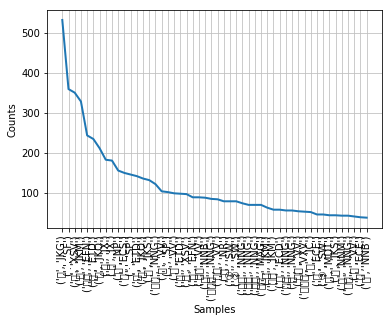

In [90]:
from nltk import Text

kolawText = Text(morphemes)
kolawText.vocab().most_common(10) 
kolawText.vocab()
kolawText.plot(50)

In [91]:
#kolawText.vocab('국민')
kolawText.similar(["국민"]), kolawText.similar(["국회"]) , kolawText.similar("국회")

kolawText.dispersion_ployt(["국민","국회","대통령"])
# ==> preprocessing(Tokenizing, Stemming(BPE),Ngram/) 

AttributeError: 'tuple' object has no attribute 'isalpha'

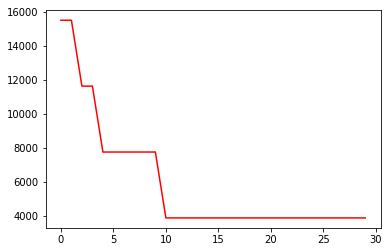

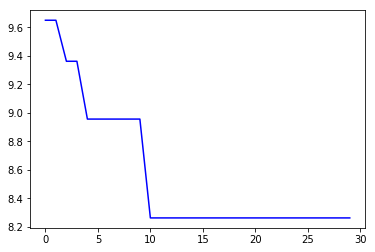

In [92]:
import os
import matplotlib.pyplot as plt
from math import log
from konlpy.tag import Okt #=> Twitter

base = "./news"
ma = Okt()
morphemes = list()

# foo _ in os.lisdr:(base)
for _ in [ _ for _ in os.listdir(base) if _.endswith("txt")] :
    
    
    with open(base +"/"+ _ ,encoding="utf-8") as fp :
        text = fp.read()
                                                    
    for sententce in sent_tokenize(text) :
        morphemes.extend(ma.morphs(sentence))

obj = Text(morphemes)
                                                    
#x = [_[0] for _ in obj.voca().most_common(30)]
x = range(len(obj.vocab().most_common() ))
y = [ _[1] for _ in obj.vocab().most_common(30)]
yy = [ log(_) for _ in y ]
     
#x, y, yy    
plt.plot(x, y, "r-")
plt.show()
                                                    
plt.plot(x, yy, "b-")
plt.show()


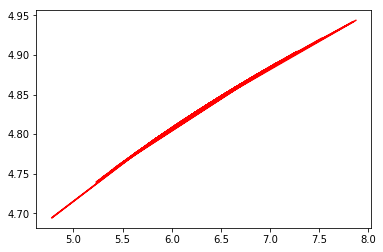

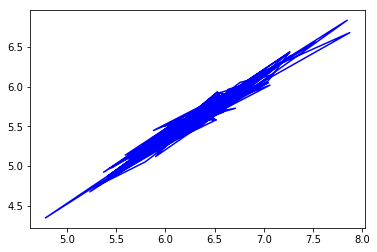

In [62]:
import os
import matplotlib.pyplot as plt
from math import log
from konlpy.tag import Okt #=> Twitter

base = "./news/"
ma = Okt()
k = 50  # 10-100
b = 0.5 # 0.4~0.6
# M = kT**b
# M(유니크) = k * T(전체단어의수)

text = ""
morphemes = list()

# foo _ in os.lisdr:(base)
for _ in [ _ for _ in os.listdir(base) if _.endswith("txt")] :
    tokens = list()
    
    with open(base + _ ,encoding="utf-8") as fp :
        text = fp.read()
                                                    
    for sentence in sent_tokenize(text) :
        tokens.extend(ma.morphs(sentence))
    morphemes.append(tokens)

obj = Text(morphemes)
x = [ log(len(_)) for _ in morphemes]
y = [ log(k)+b*log(_) for _ in x]
yy = [log(len(set(_))) for _ in morphemes]
     
#x, y, yy    
plt.plot(x, y, "r-")
plt.show()

plt.plot(x, yy, "b-")
plt.show()

## Mecab --> linux, Khaii --> linux

In [199]:
# Beautiful is better than ugly.
#      1     2   3      4   5 6

# P(4|1-3) ==>  p(4|3)*P(3|2)*P(2|1)*P(1)
# ==> 1st Markov Assuption
# p(4|3) => 4hits / 3hits
# work_tokenzied

# n-gram(bi-gram = n=2)
# 어절 = 형태소조홥
# 음절, 어절

# likeihood / P / Bayes ==> 낯선사람ML
# 100단어
# 1 = Beautiflee(20/N) 0.2
# 1,2 = Beautiflee(5 /0.2)
# 2,3 = Beautiflee(count / 1,2)
# 3,4 = better than


In [200]:
def eojeol(text,n=2) :
    ngram = list()
    tokens = text.split()
    
    for i in range(len(tokens)-(n-1)) :
        #print(i)
        #print(tokens[i:i+n])
        ngram.append(" ".join(tokens[i:i+n]))
    return ngram

In [201]:
for _ in sent_tokenize(corpus) :
    print(eojeol(_))
    break

['대한민국헌법 유구한', '유구한 역사와', '역사와 전통에', '전통에 빛나는', '빛나는 우리', '우리 대한국민은', '대한국민은 3·1운동으로', '3·1운동으로 건립된', '건립된 대한민국임시정부의', '대한민국임시정부의 법통과', '법통과 불의에', '불의에 항거한', '항거한 4·19민주이념을', '4·19민주이념을 계승하고,', '계승하고, 조국의', '조국의 민주개혁과', '민주개혁과 평화적', '평화적 통일의', '통일의 사명에', '사명에 입각하여', '입각하여 정의·인도와', '정의·인도와 동포애로써', '동포애로써 민족의', '민족의 단결을', '단결을 공고히', '공고히 하고,', '하고, 모든', '모든 사회적', '사회적 폐습과', '폐습과 불의를', '불의를 타파하며,', '타파하며, 자율과', '자율과 조화를', '조화를 바탕으로', '바탕으로 자유민주적', '자유민주적 기본질서를', '기본질서를 더욱', '더욱 확고히', '확고히 하여', '하여 정치·경제·사회·문화의', '정치·경제·사회·문화의 모든', '모든 영역에', '영역에 있어서', '있어서 각인의', '각인의 기회를', '기회를 균등히', '균등히 하고,', '하고, 능력을', '능력을 최고도로', '최고도로 발휘하게', '발휘하게 하며,', '하며, 자유와', '자유와 권리에', '권리에 따르는', '따르는 책임과', '책임과 의무를', '의무를 완수하게', '완수하게 하여,', '하여, 안으로는', '안으로는 국민생활의', '국민생활의 균등한', '균등한 향상을', '향상을 기하고', '기하고 밖으로는', '밖으로는 항구적인', '항구적인 세계평화와', '세계평화와 인류공영에', '인류공영에 이바지함으로써', '이바지함으로써 우리들과', '우리들과 우리들의', '우리들의 자손의', '자손의 안전과', '안전과 자유와', '자유와 행복을', '행복을 영원히', '영원히 확보할', '확보할 것을', '것을 다짐하면서', '다짐하면서 1948년', '1948년 7월

In [202]:
eojeol("가 나 다 라", n=3)


['가 나 다', '나 다 라']

In [203]:
kolawText.vocab()

FreqDist({('의', 'JKG'): 532, ('.', 'SF'): 359, ('하', 'XSV'): 350, ('에', 'JKM'): 328, ('ㄴ다', 'EFN'): 243, ('ㄴ', 'ETD'): 234, ('을', 'JKO'): 211, ('은', 'JX'): 182, ('는', 'JX'): 180, ('저', 'NP'): 155, ...})

In [204]:
def umjeol(text,n=2) :
    ngram = list()
    
    for i in range(len(text)-(n-1)) :
        #print(i)
        #print(tokens[i:i+n])
        ngram.append(" ".join(text[i:i+n]))
    return ngram

In [205]:
for _ in sent_tokenize(corpus) :
    #print(_.split(), umjeol(_))
    print(len(_.split()), len(umjeol(_)))
    break

94 440


In [206]:
bigram = eojeol(corpus)
bigramText = Text(bigram)
bigramText.vocab()

# 어절,음절 ngram ==> 순위, similar, 위치정보, zipf법칙, heaps법칙이 유지 되는가?
# 음소 => ㄱ , CRF, HMM

FreqDist({'수 있다.': 56, '법률이 정하는': 48, '정하는 바에': 37, '바에 의하여': 36, '법률로 정한다.': 28, '모든 국민은': 23, '수 없다.': 20, '① 모든': 14, '사항은 법률로': 14, '의무를 진다.': 11, ...})

In [207]:
Text(eojeol(corpus)).vocab()

FreqDist({'수 있다.': 56, '법률이 정하는': 48, '정하는 바에': 37, '바에 의하여': 36, '법률로 정한다.': 28, '모든 국민은': 23, '수 없다.': 20, '① 모든': 14, '사항은 법률로': 14, '의무를 진다.': 11, ...})

In [208]:
#BPE(Byte Pair Encoding)
# ("어절":빈도),("어절":빈도),("어절":빈도),
#low:5, lowest:2
#l o w</w>
#l o w e s t</w>


In [209]:
def splitTerm(term) :
    #list(term)
    #print(" ".join(list(term) + ["\w"]))
    # " " => "_"
    result = list()
    for token in term.split():
        result.append(" ".join(list(term) + ["</w>"]))
    return " _ ".join(result)

In [210]:
splitTerm("lower").split()

['l', 'o', 'w', 'e', 'r', '</w>']

In [211]:
data = {
    splitTerm("lower"):5,
    splitTerm("lowest"):2,
    splitTerm("newer"):6,
    splitTerm("wider"):3,
}
data

{'l o w e r </w>': 5,
 'l o w e s t </w>': 2,
 'n e w e r </w>': 6,
 'w i d e r </w>': 3}

In [212]:
from collections import defaultdict
# l o : 5
# o w : 5
# w e : 5
def ngram(data, n=2) :
    result = defaultdict(int)
    
    for term, freq in data.items() :
        tokens = term.split()
        for i in range(len(tokens)-(n-1)) :
            result[" ".join(tokens[i:i+n])] += freq
    return result

In [213]:
ngram(data)

defaultdict(int,
            {'l o': 7,
             'o w': 7,
             'w e': 13,
             'e r': 14,
             'r </w>': 14,
             'e s': 2,
             's t': 2,
             't </w>': 2,
             'n e': 6,
             'e w': 6,
             'w i': 3,
             'i d': 3,
             'd e': 3})

In [214]:
for term, freq in data.items():
    #print(term)
    print(ngram(term))
    break

AttributeError: 'str' object has no attribute 'items'

In [188]:
import re

def mergeNgram(maxKey,data) :
    newData = dict()
    for term, freq in data.items() :
        newKey = re.sub(maxKey , maxKey.replace(" ",""),term)
        newData[newKey] = freq
        
    return newData

In [189]:
bigram.get("e r")
max(bigram, key=bigram.get)

'e r'

In [193]:
import re
pattern = "e r"
#re.findall(pattern, list(data.keys())[0])
re.sub(pattern, pattern.replace(" ",""), list(data.keys())[0])

'lo wer</w>'

In [194]:
for _ in range(5) :
    bigram = ngram(data)
    maxKey = max(bigram, key=bigram.get)
    data = mergeNgram(maxKey, data)
data

## lower => 1:low, 2:/w
## low er => 1:low, 2:/w

{'lower</w>': 5, 'lo w e s t </w>': 2, 'newer</w>': 6, 'wider</w>': 3}